**Predict Stock Prices**
- We have basically this data set, which is nothing but my Bajaj finance data set.

- And you will see with respect to this date and we would back to this all these independent features,

- we have to predict what can be volume weighted average price with respect to all these other features
- what is the opening price and what is the highest price on that particular date?
- What is the lowest price or what was the last price as well as what is the closing price?

- we have to predict what can be the volume weighted average price with respect to all other independent features.

So it means you have to build such a time  model that can consider all other features as independent features and add that  model has to predict what can be the volume weighted average price on that particular date.

**Importing Libraries**

In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [3]:
df.set_index('Date',inplace=True)

VWAP variable to check what the trend of my value weighted average price

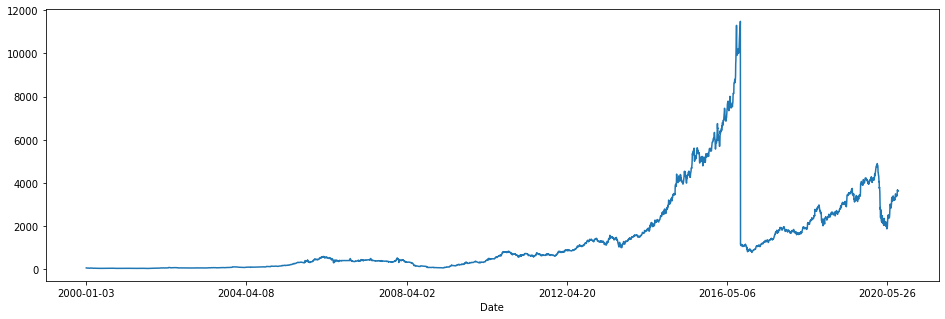

In [4]:
df['VWAP'].plot(figsize=(16,5))

In [5]:
df.shape

(5070, 14)

In [6]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840
2020-08-28,BAJFINANCE,EQ,3632.50,3650.00,3688.00,3617.05,3672.05,3670.80,3652.77,4251575,1.553003e+15,137033.0,434147.0,0.1021
2020-08-31,BAJFINANCE,EQ,3670.80,3715.00,3749.85,3465.00,3478.50,3487.80,3602.93,8529788,3.073224e+15,293454.0,1321559.0,0.1549


In [7]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

*So you can simply drop this(na)values or you can computed using <b>mean, median or different advance approaches*</b>

In [8]:
df.dropna(inplace=True)
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
df.shape

(2291, 14)

In [10]:
data= df.copy()

- I'm willing to declare a list in which I'm going to consider those features on which I can perform some kind of <b> rolling concept and moving average concept </b>  depending upon
- So let's say I'm going to consider this high, law , volume ,turnover

In [11]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [12]:
Lag_Features=['High', 'Low','Volume', 'Turnover', 'Trades']
for features in Lag_Features:
  data[features + "_rolling_mean_3"]=data[features].rolling(window= 3).mean()
  data[features + "_rolling_mean_7"]=data[features].rolling(window= 7).mean()
  data[features + "_rolling_std_7"]=data[features].rolling(window= 7).std()
  data[features + "_rolling_std_3"]=data[features].rolling(window= 3).std()


In [13]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High_rolling_mean_3,High_rolling_mean_7,High_rolling_std_7,High_rolling_std_3,Low_rolling_mean_3,Low_rolling_mean_7,Low_rolling_std_7,Low_rolling_std_3,Volume_rolling_mean_3,Volume_rolling_mean_7,Volume_rolling_std_7,Volume_rolling_std_3,Turnover_rolling_mean_3,Turnover_rolling_mean_7,Turnover_rolling_std_7,Turnover_rolling_std_3,Trades_rolling_mean_3,Trades_rolling_mean_7,Trades_rolling_std_7,Trades_rolling_std_3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900,637.733333,NaN,NaN,1.201388,618.666667,NaN,NaN,2.309401,20363.333333,NaN,NaN,26980.871860,1.274338e+12,NaN,NaN,1.685217e+12,661.000000,NaN,NaN,670.500559
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,NaN,1.625833,617.116667,NaN,NaN,4.994080,19880.666667,NaN,NaN,27352.695339,1.242081e+12,NaN,NaN,1.710136e+12,278.333333,NaN,NaN,148.769396
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,NaN,9.062422,611.783333,NaN,NaN,8.008797,20954.666667,NaN,NaN,26391.221653,1.306735e+12,NaN,NaN,1.652377e+12,225.333333,NaN,NaN,78.270897


In [14]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'High_rolling_std_7', 'High_rolling_std_3', 'Low_rolling_mean_3',
       'Low_rolling_mean_7', 'Low_rolling_std_7', 'Low_rolling_std_3',
       'Volume_rolling_mean_3', 'Volume_rolling_mean_7',
       'Volume_rolling_std_7', 'Volume_rolling_std_3',
       'Turnover_rolling_mean_3', 'Turnover_rolling_mean_7',
       'Turnover_rolling_std_7', 'Turnover_rolling_std_3',
       'Trades_rolling_mean_3', 'Trades_rolling_mean_7',
       'Trades_rolling_std_7', 'Trades_rolling_std_3'],
      dtype='object')

In [15]:
data.shape

(2291, 34)

In [16]:
data.dropna(inplace=True)

In [17]:
independant_feaut=['High_rolling_mean_3', 'High_rolling_mean_7',
       'High_rolling_std_7', 'High_rolling_std_3', 'Low_rolling_mean_3',
       'Low_rolling_mean_7', 'Low_rolling_std_7', 'Low_rolling_std_3',
       'Volume_rolling_mean_3', 'Volume_rolling_mean_7',
       'Volume_rolling_std_7', 'Volume_rolling_std_3',
       'Turnover_rolling_mean_3', 'Turnover_rolling_mean_7',
       'Turnover_rolling_std_7', 'Turnover_rolling_std_3',
       'Trades_rolling_mean_3', 'Trades_rolling_mean_7',
       'Trades_rolling_std_7', 'Trades_rolling_std_3']

So this is exactly my all the independent features.

In [18]:
training_data=data[0:1800]
test_data=data[1800:]

So now I'm going to create my training data and asking you to select CNN when you create a new
data frame as training, as good data.

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

In [26]:
model = auto_arima(y=training_data['VWAP'],exogenous= training_data[independant_feaut],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.537, Time=6.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.225, Time=3.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.349, Time=3.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.321, Time=4.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=3.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.235, Time=4.91 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 25.917 seconds


In [27]:
model.fit(training_data['VWAP'],training_data[independant_feaut])

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [30]:
forecast=model.predict(n_periods=len(test_data),exogenous=test_data[independant_feaut])

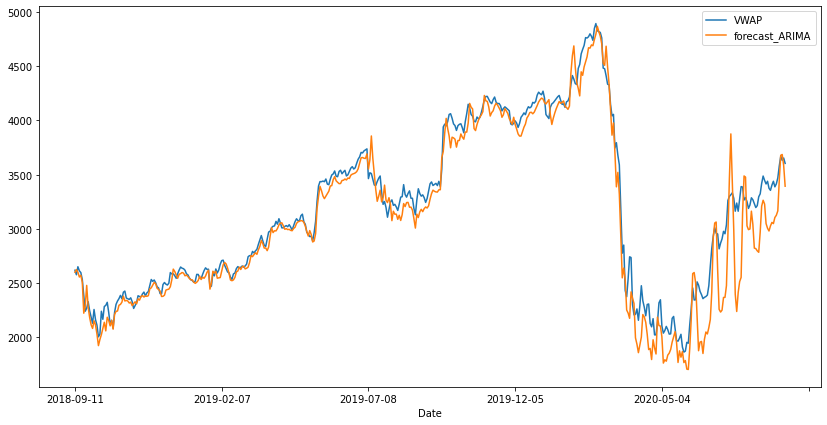

In [33]:
test_data['forecast_ARIMA']=forecast
test_data[['VWAP','forecast_ARIMA']].plot(figsize=(14,7))

In [34]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [35]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['forecast_ARIMA']))

187.78789426455583

In [36]:
mean_absolute_error(test_data['VWAP'],test_data['forecast_ARIMA'])

124.66113879696188